In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os

df = pd.read_csv("out/asos_gustiness.csv")
df

,wban_id,name,state,lat,lon,ndays,nhours_with_gusts,nfourhours_with_gusts,ndays_with_gusts,nhours_with_sig_gusts,...,prob_asos_gust_hour_given_0_est_reports,prob_asos_gust_hour_given_1_est_reports,prob_asos_gust_hour_given_2_est_reports,prob_asos_gust_hour_given_3_est_reports,prob_asos_gust_hour_given_4+_est_reports,prob_asos_gust_day_given_0_est_reports,prob_asos_gust_day_given_1_est_reports,prob_asos_gust_day_given_2_est_reports,prob_asos_gust_day_given_3_est_reports,prob_asos_gust_day_given_4+_est_reports
0,94037,BUFFALO (ASOS),SD,45.604294,-103.546996,6028,79,69,65,8,...,0.000456,0.200000,0.090909,0.000000,0.000000,0.008209,0.324324,0.153846,0.000000,0.400000
1,93997,RUSSELL MUNICIPAL AP,KS,38.874910,-98.809207,6150,72,65,59,11,...,0.000312,0.137615,0.222222,0.090909,0.307692,0.004141,0.210526,0.368421,0.285714,0.478261
2,3013,LAMAR MUNICIPAL AP,CO,38.070593,-102.687863,6150,70,60,56,3,...,0.000434,0.277778,0.333333,0.000000,NaN,0.007832,0.294118,0.666667,1.000000,NaN
3,3026,BURLINGTON CARSON AP,CO,39.244720,-102.284170,5936,67,59,54,3,...,0.000414,0.137255,0.083333,0.000000,0.000000,0.007317,0.153846,0.333333,0.000000,0.000000
4,23064,GARDEN CITY REGIONAL AP,KS,37.927220,-100.724720,6150,67,55,51,6,...,0.000278,0.135417,0.250000,0.285714,0.428571,0.003310,0.142857,0.458333,0.307692,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,26411,FAIRBANKS INTL AP,AK,64.803781,-147.876097,6940,0,0,0,0,...,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
862,26415,BIG DELTA AP,AK,63.994387,-145.720367,6940,0,0,0,0,...,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
863,26451,ANCHORAGE TED STEVENS INTL AP,AK,61.171901,-150.025096,6940,0,0,0,0,...,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
864,26528,TALKEETNA AP,AK,62.319969,-150.095349,6940,0,0,0,0,...,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN


In [2]:
# see if NaNs look right
df["prob_asos_gust_day_given_4+_est_reports"]

0      0.400000
1      0.478261
2           NaN
3      0.000000
4      0.533333
         ...   
861         NaN
862         NaN
863         NaN
864         NaN
865    0.000000
Name: prob_asos_gust_day_given_4+_est_reports, Length: 866, dtype: float64

In [3]:
def find_index(f, xs):
    for i, x in enumerate(xs):
        if f(x):
            return i
    return None

BOOTSTRAP_SAMPLES = 10000

def bootstrap_confidence_interval(xs):
    sampled_means = []
    as_list = [x for x in xs if not np.isnan(x)]

    for _ in range(BOOTSTRAP_SAMPLES):
        resampled = [random.choice(as_list) for _ in range(len(as_list))]
        sampled_means.append(np.mean(resampled))

    return np.percentile(sampled_means, [2.5, 97.5])

def centered_bootstrap_confidence_interval(xs):
    mean = np.nanmean(xs)
    return [x - mean for x in bootstrap_confidence_interval(xs)]


In [4]:
est_reports_per_year_thresholds = [
    df.est_reports_per_year.quantile(0.2),
    df.est_reports_per_year.quantile(0.4),
    df.est_reports_per_year.quantile(0.6),
    df.est_reports_per_year.quantile(0.8),
    df.est_reports_per_year.max() + 0.01
]
est_reports_per_year_thresholds

[0.43071935, 5.2916946, 12.631124, 26.90378, 101.63791400000001]

In [5]:
grouped = df.groupby(lambda i: find_index(lambda thresh: df.est_reports_per_year[i] < thresh, est_reports_per_year_thresholds))
grouped[[
    "est_reports_per_year",
    "prob_asos_gust_hour_given_0_est_reports",
    "prob_asos_gust_hour_given_1_est_reports",
    "prob_asos_gust_hour_given_2_est_reports",
    "prob_asos_gust_hour_given_3_est_reports",
    "prob_asos_gust_hour_given_4+_est_reports",
]].mean()

,est_reports_per_year,prob_asos_gust_hour_given_0_est_reports,prob_asos_gust_hour_given_1_est_reports,prob_asos_gust_hour_given_2_est_reports,prob_asos_gust_hour_given_3_est_reports,prob_asos_gust_hour_given_4+_est_reports
0,0.111316,0.000029,0.045794,0.066667,0.000000,0.000000
1,2.212629,0.000070,0.061730,0.096057,0.109107,0.187662
2,8.837763,0.000052,0.030168,0.054199,0.094500,0.159685
3,19.072262,0.000028,0.013184,0.031302,0.053878,0.096478
4,39.986381,0.000017,0.005732,0.011598,0.027455,0.069887


In [15]:
groupings = np.array([find_index(lambda thresh: df.est_reports_per_year[i] < thresh, est_reports_per_year_thresholds) for i in df.index])

In [7]:
grouped = df.groupby(lambda i: find_index(lambda thresh: df.est_reports_per_year[i] < thresh, est_reports_per_year_thresholds))
means = grouped[[
    "est_reports_per_year",
    "prob_asos_gust_day_given_0_est_reports",
    "prob_asos_gust_day_given_1_est_reports",
    "prob_asos_gust_day_given_2_est_reports",
    "prob_asos_gust_day_given_3_est_reports",
    "prob_asos_gust_day_given_4+_est_reports",
]].mean(numeric_only=True) #NaNs ignored

df[groupings == 0]["prob_asos_gust_day_given_0_est_reports"]

14     0.007065
23     0.006183
34     0.005899
44     0.005226
47     0.004719
         ...   
860    0.000000
861    0.000000
862    0.000000
863    0.000000
864    0.000000
Name: prob_asos_gust_day_given_0_est_reports, Length: 173, dtype: float64

## Plots

Processing: mean_station_probability_of_an_asos_gust_day_given_n_estimated_gusts_within_25_miles.png
    1172x938 pixels, PNG format
    4x8 bits/pixel, RGBA
    IDAT size = 76972 bytes
    File size = 77131 bytes
Reducing image to 3x8 bits/pixel, RGB
Trying: 6 combinations
Found better combination:
    zc = 0  zs = 0  f = 0        55354 bytes
    IDAT size = 55354 bytes (21618 bytes decrease)
    file size = 55432 bytes (21699 bytes = 28.13% decrease)
Output: mean_station_probability_of_an_asos_gust_day_given_n_estimated_gusts_within_25_miles.png


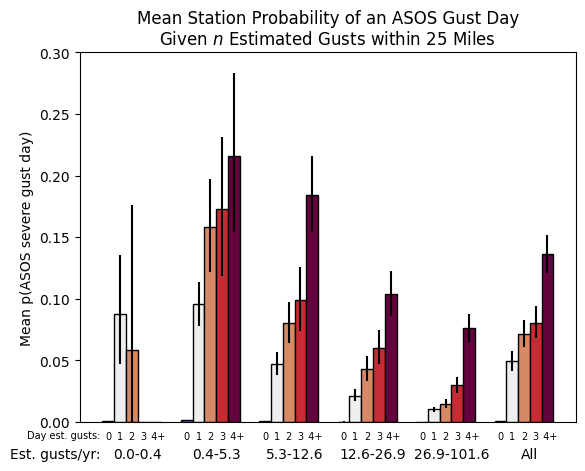

In [16]:
fig, ax = plt.subplots()

col_names = [
    "prob_asos_gust_day_given_0_est_reports",
    "prob_asos_gust_day_given_1_est_reports",
    "prob_asos_gust_day_given_2_est_reports",
    "prob_asos_gust_day_given_3_est_reports",
    "prob_asos_gust_day_given_4+_est_reports",
]

bar_width = 0.15
colors = [
    (0.325, 0.510, 0.839),
    (0.933, 0.933, 0.933),
    (0.835, 0.541, 0.396),
    (0.780, 0.173, 0.204),
    (0.392, 0.016, 0.247),
]

ax.set_ylim(0,0.3)

ax.set_title("Mean Station Probability of an ASOS Gust Day\nGiven $n$ Estimated Gusts within 25 Miles")

ax.set_ylabel("Mean p(ASOS severe gust day)")

ax.tick_params(axis="x", length=0, pad=6.5)
# ax.set_xticks(add_vec(range(len(head_to_head_tasks)) + [len(head_to_head_tasks) + 0.5], bar_width*2))
ax.set_xticks([group_i + nreports*bar_width for group_i in range(len(means)+1) for nreports in range(5)])
ax.set_xticklabels(["0","1","2","3","  4+"] * (len(means)+1), fontdict={'fontsize': 7})
ax.text(-0.1, -0.007, "Day est. gusts:", ha="right", size=7, va="top", linespacing=2.0)

for (group_i, threshold) in enumerate(est_reports_per_year_thresholds):
    lo = est_reports_per_year_thresholds[group_i - 1] if group_i >= 1 else 0.0
    hi = est_reports_per_year_thresholds[group_i]
    ax.text(group_i + 5*bar_width/2,   0, f"\n{lo:.1f}-{hi:.1f}", ha="center", va="top", linespacing=2.0)

ax.text(len(est_reports_per_year_thresholds) + 5*bar_width/2, 0, "\nAll", ha="center", va="top", linespacing=2.0)

ax.text(-0.1, 0, "\nEst. gusts/yr:", ha="right", va="top", linespacing=2.0)


# By quantile
for nreports in range(5):
    datas = [df[groupings == group_i][col_names[nreports]] for group_i in range(5)]
    cis   = [centered_bootstrap_confidence_interval(datas[i]) for i in range(5)]
    lows  = [-ci[0] for ci in cis]
    highs = [ci[1] for ci in cis]
    ax.bar(np.array(range(len(means))) + nreports*bar_width, means[col_names[nreports]], bar_width, yerr=[lows, highs], color=colors[nreports], linewidth=1, edgecolor="black")

# All
for nreports in range(5):
    cis   = [centered_bootstrap_confidence_interval(df[col_names[nreports]])]
    lows  = [-ci[0] for ci in cis]
    highs = [ci[1] for ci in cis]
    ax.bar([len(means) + nreports*bar_width], [np.nanmean(df[col_names[nreports]])], bar_width, yerr=[lows, highs], color=colors[nreports], linewidth=1, edgecolor="black")

out_path = "mean_station_probability_of_an_asos_gust_day_given_n_estimated_gusts_within_25_miles"
plt.savefig(out_path + ".pdf", bbox_inches='tight')
plt.savefig(out_path + ".png", dpi=200, bbox_inches='tight')
os.system(f"oxipng -o max --strip safe --libdeflater {out_path}.png")
plt.show()

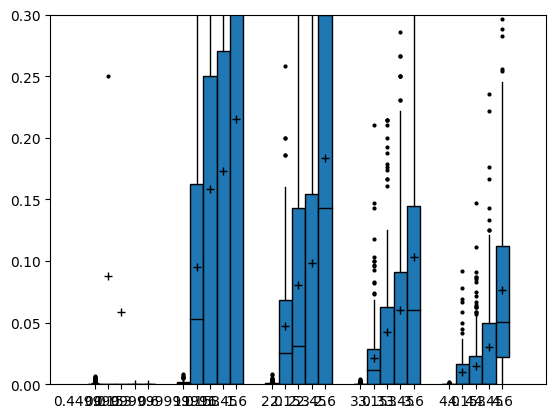

In [9]:
# By quantile, boxplots

fig, ax = plt.subplots()

col_names = [
    "prob_asos_gust_day_given_0_est_reports",
    "prob_asos_gust_day_given_1_est_reports",
    "prob_asos_gust_day_given_2_est_reports",
    "prob_asos_gust_day_given_3_est_reports",
    "prob_asos_gust_day_given_4+_est_reports",
]

bar_width = 0.15
ts_color      = "#FFD280"

ax.set_ylim(0,0.3)

for nreports in range(5):
    datas = [df[groupings == group_i][col_names[nreports]].dropna() for group_i in range(5)]
    positions = np.array(range(5)) + nreports*bar_width
    ax.boxplot(datas, positions=positions,  widths=bar_width, labels=None, showmeans=True, showcaps=False, medianprops={"color": "black"}, meanprops={"markeredgecolor": "black", "marker": "+", "markerfacecolor": "none"}, flierprops={"markeredgecolor": "none", "marker": ".", "markerfacecolor": "black"}, patch_artist=True)

plt.show()

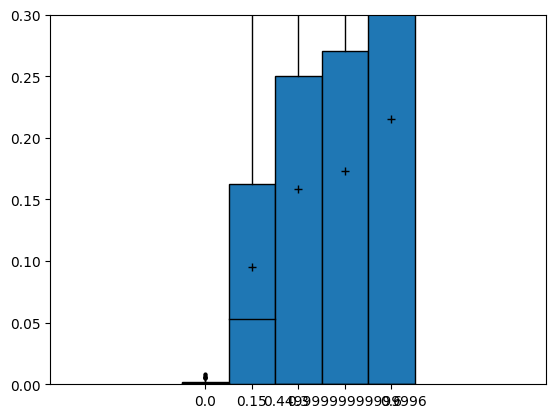

In [10]:
# All, boxplots

fig, ax = plt.subplots()

col_names = [
    "prob_asos_gust_day_given_0_est_reports",
    "prob_asos_gust_day_given_1_est_reports",
    "prob_asos_gust_day_given_2_est_reports",
    "prob_asos_gust_day_given_3_est_reports",
    "prob_asos_gust_day_given_4+_est_reports",
]

bar_width = 0.15
ts_color  = "#FFD280"

ax.set_ylim(0,0.3)

for nreports in range(5):
    datas = [ df[groupings == 1][col_names[nreports]].dropna() ]
    positions = [nreports*bar_width]
    ax.boxplot(datas, positions=positions,  widths=bar_width, labels=None, showmeans=True, showcaps=False, medianprops={"color": "black"}, meanprops={"markeredgecolor": "black", "marker": "+", "markerfacecolor": "none"}, flierprops={"markeredgecolor": "none", "marker": ".", "markerfacecolor": "black"}, patch_artist=True)

plt.show()